## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Loading the dataset
raw_data = pd.read_csv('Train.csv')
raw_data.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [3]:
# Dropping the ID Column
raw_data.drop('Item_Id',axis=1,inplace=True)

In [4]:
# Converting the string date in Datetime
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data['Date'][0]

Timestamp('2007-07-05 00:00:00')

In [5]:
month_vals = []
for i in range(raw_data.shape[0]):
    month_vals.append(raw_data['Date'][i].month)
month_vals[:25]

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

In [6]:
raw_data['Month Value'] = month_vals
raw_data.head()

,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,Month Value
0,2007-07-05,0,0,0,0,0.5,2785,4240,7
1,2007-07-05,0,1,0,0,0.7,3574,4756,7
2,2007-07-05,0,103,0,1,1.6,5978,9669,7
3,2007-07-05,0,103,0,0,0.0,5681,8313,7
4,2007-07-05,0,103,0,2,0.0,4924,7257,7


In [7]:
weeks_vals = []
for i in range(raw_data.shape[0]):
    weeks_vals.append(raw_data['Date'][i].weekday())
weeks_vals[:25]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [8]:
raw_data['Day of Week'] = weeks_vals
raw_data.head()

,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,Month Value,Day of Week
0,2007-07-05,0,0,0,0,0.5,2785,4240,7,3
1,2007-07-05,0,1,0,0,0.7,3574,4756,7,3
2,2007-07-05,0,103,0,1,1.6,5978,9669,7,3
3,2007-07-05,0,103,0,0,0.0,5681,8313,7,3
4,2007-07-05,0,103,0,2,0.0,4924,7257,7,3


In [9]:
date_cleaned = raw_data.drop('Date',axis=1)
date_cleaned.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,Month Value,Day of Week
0,0,0,0,0,0.5,2785,4240,7,3
1,0,1,0,0,0.7,3574,4756,7,3
2,0,103,0,1,1.6,5978,9669,7,3
3,0,103,0,0,0.0,5681,8313,7,3
4,0,103,0,2,0.0,4924,7257,7,3


In [10]:
date_cleaned['Month Value'].value_counts()

7     1107
3     1107
2     1012
8      956
4      871
9      791
5      783
1      779
10     641
11     623
6      591
12     537
Name: Month Value, dtype: int64

In [11]:
date_cleaned['Day of Week'].value_counts()

6    1658
5    1617
4    1501
0    1483
3    1390
1    1387
2     762
Name: Day of Week, dtype: int64

In [12]:
# Unique state in data
date_cleaned['State_of_Country'].nunique()

21

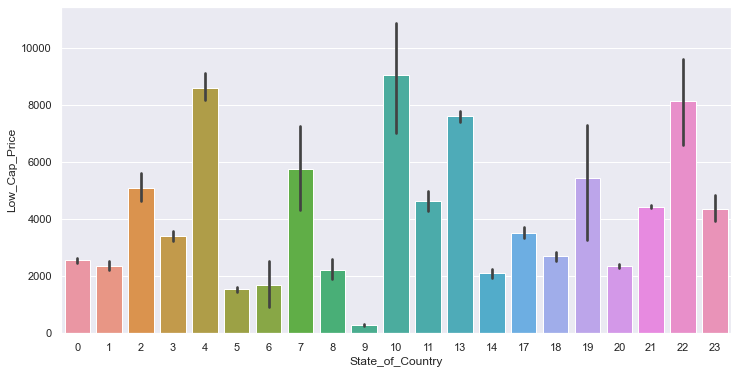

In [13]:
# Differnt state has differnt low price
fig = plt.figure(figsize=(12,6))
sns.barplot(data=date_cleaned,x='State_of_Country',y='Low_Cap_Price',dodge=False)

In [14]:
state_dumm = pd.get_dummies(date_cleaned['State_of_Country'],drop_first=True)
state_dumm.head()

,1,2,3,4,5,6,7,8,9,10,11,13,14,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
missing_columns = set(range(1,24))-set(state_dumm.columns)
missing_columns

{12, 15, 16}

In [16]:
for i in missing_columns:
    state_dumm[i] = 0
state_dumm.set_axis(range(1,24),axis=1,inplace=True)

In [17]:
state_dumm.columns = ['State_1','State_2','State_3','State_4','State_5','State_6','State_7','State_8','State_9','State_10','State_11','State_12','State_13','State_14','State_15','State_16','State_17','State_18','State_19','State_20','State_21','State_22','State_23']

In [18]:
pd.options.display.max_columns = 25
state_dumm.head()

,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,State_10,State_11,State_12,State_13,State_14,State_15,State_16,State_17,State_18,State_19,State_20,State_21,State_22,State_23
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
date_cleaned.drop('State_of_Country',axis=1,inplace=True)
state_data = pd.concat([date_cleaned,state_dumm],axis=1)
state_data.head()

,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,...,State_12,State_13,State_14,State_15,State_16,State_17,State_18,State_19,State_20,State_21,State_22,State_23
0,0,0,0,0.5,2785,4240,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0.7,3574,4756,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,103,0,1,1.6,5978,9669,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,103,0,0,0.0,5681,8313,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,103,0,2,0.0,4924,7257,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
## Check Point
df = state_data.copy()

In [21]:
df['Product_Category'].value_counts()

0     7167
10    1050
1      524
13     408
12     204
15     168
16      79
11      62
14      43
7       30
5       23
6       18
3        9
4        5
17       4
9        2
8        2
Name: Product_Category, dtype: int64

In [22]:
df['Product_Category'] = df['Product_Category'].map({0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:2,12:2,13:2,14:2,15:2,16:2,17:2})

In [23]:
df['Product_Category'].value_counts()

0    7167
1    1663
2     968
Name: Product_Category, dtype: int64

In [24]:
catogories = pd.get_dummies(df['Product_Category'],drop_first=True)
catogories.columns = ['Product_1','Product_2']

In [25]:
df.drop('Product_Category',axis=1,inplace=True)

In [26]:
df = pd.concat([df,catogories],axis=1)
df.head()

,Market_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,...,State_14,State_15,State_16,State_17,State_18,State_19,State_20,State_21,State_22,State_23,Product_1,Product_2
0,0,0,0.5,2785,4240,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0.7,3574,4756,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,103,1,1.6,5978,9669,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,103,0,0.0,5681,8313,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,103,2,0.0,4924,7257,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df['Grade'].unique()

array([0, 1, 2, 3], dtype=int64)

In [28]:
grade = pd.get_dummies(df['Grade'],drop_first=True)

In [29]:
grade.columns = ['Grade_1','Grade_2','Grade_3']

In [30]:
df.drop('Grade',axis=1,inplace=True)
df = pd.concat([df,grade],axis=1)
df.head()

,Market_Category,Demand,Low_Cap_Price,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,...,State_17,State_18,State_19,State_20,State_21,State_22,State_23,Product_1,Product_2,Grade_1,Grade_2,Grade_3
0,0,0.5,2785,4240,7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.7,3574,4756,7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,103,1.6,5978,9669,7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0
3,103,0.0,5681,8313,7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,103,0.0,4924,7257,7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
# CheckPoint 2
df2 = df.copy()

In [32]:
pd.options.display.max_rows = 300
df2['Market_Category'].value_counts()

23     495
452    476
358    431
55     399
58     373
3      350
24     323
14     281
447    271
443    227
65     226
451    204
469    181
268    177
57     166
152    141
441    140
93     131
11     113
113    110
294    110
186    103
70      99
198     97
62      85
165     84
471     84
403     84
446     80
188     77
423     74
104     73
320     73
450     73
1       72
283     71
162     68
115     66
74      66
437     65
94      65
63      59
445     58
205     56
103     56
98      55
141     53
39      52
275     50
124     50
0       49
90      48
101     47
211     45
30      44
350     43
458     43
416     43
220     42
80      42
444     41
60      41
149     40
2       40
121     39
204     39
73      38
137     37
13      34
453     34
37      33
256     32
456     32
38      31
100     31
460     30
116     30
87      29
83      29
175     27
108     27
448     27
192     26
106     25
97      25
111     23
151     22
235     21
199     21
454     21
76      21

In [33]:
df2['Market_Category'].nunique()

275

In [34]:
vals = set(df2['Market_Category'])
vals

{0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 106,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 143,
 144,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 155,
 156,
 158,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 173,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 195,
 196,
 197,
 198,
 199,
 200,
 202,
 203,
 204,
 205,
 206,
 208,
 209,
 

In [35]:
df2['Market_Category'].nunique()

275

In [36]:
for i in vals:
    if i < 100:
        df2['Market_Category'].replace(i,0,inplace=True)
    if 100 <= i < 200:
        df2['Market_Category'].replace(i,1,inplace=True)
    if 200 <= i < 300:
        df2['Market_Category'].replace(i,2,inplace=True)
    if 300 <= i < 400:
        df2['Market_Category'].replace(i,3,inplace=True)
    else:
        df2['Market_Category'].replace(i,4,inplace=True)

In [37]:
df2['Market_Category'].value_counts()

0    4216
4    2428
1    1697
2     809
3     648
Name: Market_Category, dtype: int64

In [38]:
mar_dum = pd.get_dummies(df2['Market_Category'],drop_first=True)
mar_dum.columns = ['Market_Category1','Market_Category2','Market_Category3','Market_Category4']
mar_dum.head()

,Market_Category1,Market_Category2,Market_Category3,Market_Category4
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [39]:
#creating the checkpoint
df3 = df2.copy()

In [40]:
df3 = pd.concat([df.drop('Market_Category',axis=1),mar_dum],axis=1)

In [41]:
df3.head()

,Demand,Low_Cap_Price,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,State_7,...,State_21,State_22,State_23,Product_1,Product_2,Grade_1,Grade_2,Grade_3,Market_Category1,Market_Category2,Market_Category3,Market_Category4
0,0.5,2785,4240,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0.7,3574,4756,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,1.6,5978,9669,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0
3,0.0,5681,8313,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
4,0.0,4924,7257,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0


In [42]:
df3['Demand'].describe()

count     9798.000000
mean        71.977414
std        927.194052
min          0.000000
25%          0.500000
50%          2.000000
75%         10.175000
max      64160.500000
Name: Demand, dtype: float64

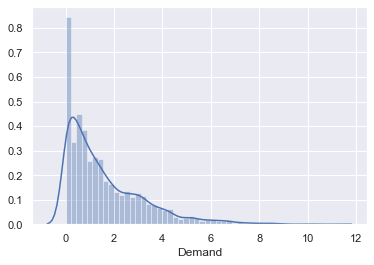

In [43]:
sns.distplot(np.log1p(df3['Demand']))

In [44]:
df3['Demand'].min()

0.0

In [45]:
df3['Demand'].max()

64160.5

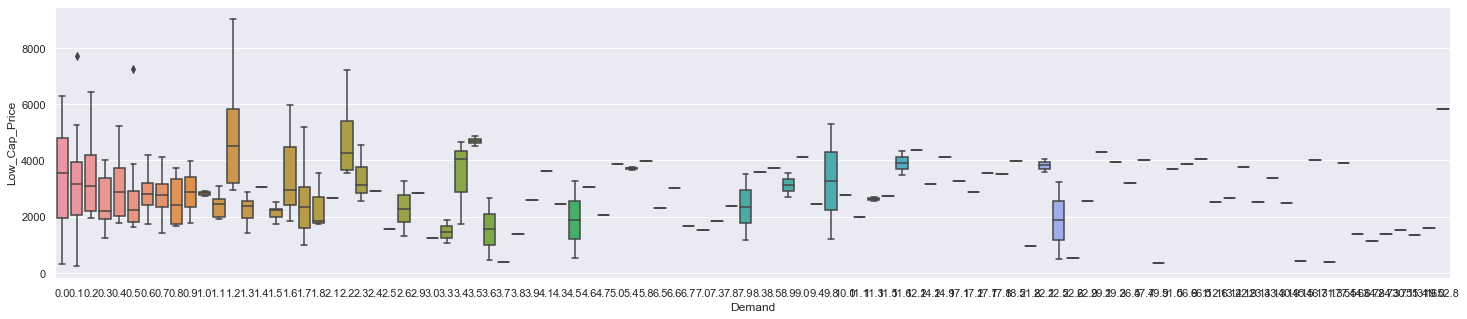

In [46]:
plt.figure(figsize=(25,5))
sns.boxplot(data=df3[:300],x = 'Demand',y = 'Low_Cap_Price')

In [47]:
pd.options.display.max_rows = None
df3['Demand'].value_counts(sort=True)

0.0        825
0.2        522
0.1        483
0.6        400
1.2        289
0.5        264
0.3        236
0.7        235
0.4        223
1.1        210
0.9        174
1.7        169
0.8        167
2.3        161
1.8        154
2.4        153
1.0        148
1.4        110
3.6         96
2.2         91
3.0         78
1.6         77
1.3         76
2.9         74
1.5         71
3.4         71
3.5         69
2.8         69
4.5         61
2.6         56
2.1         53
4.7         51
3.3         49
1.9         48
2.7         43
4.8         43
4.6         42
2.0         42
5.9         41
4.0         38
4.2         37
2.5         36
5.7         36
5.8         33
4.1         32
5.1         32
6.9         32
3.9         31
6.0         31
3.7         29
5.6         27
3.1         26
4.9         26
11.2        25
5.4         24
7.8         24
7.3         23
7.0         22
7.1         21
11.6        20
5.5         20
11.3        20
8.4         20
6.7         20
11.4        19
6.8         19
4.3       

In [48]:
df3.head()

,Demand,Low_Cap_Price,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,State_7,...,State_21,State_22,State_23,Product_1,Product_2,Grade_1,Grade_2,Grade_3,Market_Category1,Market_Category2,Market_Category3,Market_Category4
0,0.5,2785,4240,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0.7,3574,4756,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,1.6,5978,9669,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0
3,0.0,5681,8313,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
4,0.0,4924,7257,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0


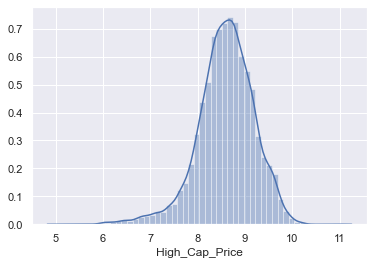

In [49]:
sns.distplot(np.log(df3['High_Cap_Price']))

In [50]:
# Check point
unscaled_data = df3
unscaled_data.head()

,Demand,Low_Cap_Price,High_Cap_Price,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,State_7,...,State_21,State_22,State_23,Product_1,Product_2,Grade_1,Grade_2,Grade_3,Market_Category1,Market_Category2,Market_Category3,Market_Category4
0,0.5,2785,4240,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0.7,3574,4756,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,1.6,5978,9669,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0
3,0.0,5681,8313,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
4,0.0,4924,7257,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0


In [51]:
unscaled_data.columns

Index(['Demand', 'Low_Cap_Price', 'High_Cap_Price', 'Month Value',
       'Day of Week', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'State_6', 'State_7', 'State_8', 'State_9', 'State_10', 'State_11',
       'State_12', 'State_13', 'State_14', 'State_15', 'State_16', 'State_17',
       'State_18', 'State_19', 'State_20', 'State_21', 'State_22', 'State_23',
       'Product_1', 'Product_2', 'Grade_1', 'Grade_2', 'Grade_3',
       'Market_Category1', 'Market_Category2', 'Market_Category3',
       'Market_Category4'],
      dtype='object')

In [52]:
cols_name = ['Demand','Month Value',
       'Day of Week', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'State_6', 'State_7', 'State_8', 'State_9', 'State_10', 'State_11',
       'State_12', 'State_13', 'State_14', 'State_15', 'State_16', 'State_17',
       'State_18', 'State_19', 'State_20', 'State_21', 'State_22', 'State_23',
       'Product_1', 'Product_2', 'Grade_1', 'Grade_2', 'Grade_3',
       'Market_Category1', 'Market_Category2', 'Market_Category3',
       'Market_Category4','High_Cap_Price','Low_Cap_Price']

In [53]:
df3 = df3.reindex(columns=cols_name)

In [54]:
df3.head()

,Demand,Month Value,Day of Week,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,...,State_23,Product_1,Product_2,Grade_1,Grade_2,Grade_3,Market_Category1,Market_Category2,Market_Category3,Market_Category4,High_Cap_Price,Low_Cap_Price
0,0.5,7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,4240,2785
1,0.7,7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,4756,3574
2,1.6,7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,9669,5978
3,0.0,7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,8313,5681
4,0.0,7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,7257,4924


In [55]:
df3.to_csv('Preprocessed_Trian_data.csv')